In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import glob
from skimage.feature import hog
import time
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#sklearn


In [2]:
"""
데이터 적재 
"""

'\n데이터 적재 \n'

In [3]:
car_images = []
noncar_images = []
print('0')
for root, dirs, files in os.walk('./data/vehicles/'):
    print("1")
    print("root"+ root)
    print( dirs)
    print("="*30)
    print( files)
    print("-"*30)
    for file in files:
        print("2")
        if file.endswith(".png"):
            print('3')
            car_images.append(os.path.join(root, file))
            print('4')
            
print('no0')
for root, dirs, files in os.walk('./data/non-vehicles/'):
    print("no1")
    print("no_root"+ root)
    print( dirs)
    print("#"*30)
    print( files)
    print("*"*30)
    for file in files:
        print("no2")
        if file.endswith(".png"):
            print('no3')
            noncar_images.append(os.path.join(root, file))
            print('no4')

0
1
root./data/vehicles/
['GTI_Far', 'GTI_Left', 'GTI_MiddleClose', 'GTI_Right', 'KITTI_extracted']
[]
------------------------------
1
root./data/vehicles/GTI_Far
[]
['image0000.png', 'image0001.png', 'image0002.png', 'image0003.png', 'image0004.png', 'image0005.png', 'image0006.png', 'image0007.png', 'image0008.png', 'image0009.png', 'image0010.png', 'image0014.png', 'image0015.png', 'image0016.png', 'image0018.png', 'image0019.png', 'image0021.png', 'image0022.png', 'image0023.png', 'image0024.png', 'image0027.png', 'image0029.png', 'image0030.png', 'image0033.png', 'image0036.png', 'image0037.png', 'image0039.png', 'image0040.png', 'image0041.png', 'image0042.png', 'image0043.png', 'image0044.png', 'image0045.png', 'image0046.png', 'image0047.png', 'image0048.png', 'image0049.png', 'image0050.png', 'image0051.png', 'image0052.png', 'image0053.png', 'image0054.png', 'image0064.png', 'image0065.png', 'image0066.png', 'image0067.png', 'image0068.png', 'image0069.png', 'image0070.png',

4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2


2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3


2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3


4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2


3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4


no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3


no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2


no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3


no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3


no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3


no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3


no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2


In [4]:
car_images

['./data/vehicles/GTI_Far\\image0000.png',
 './data/vehicles/GTI_Far\\image0001.png',
 './data/vehicles/GTI_Far\\image0002.png',
 './data/vehicles/GTI_Far\\image0003.png',
 './data/vehicles/GTI_Far\\image0004.png',
 './data/vehicles/GTI_Far\\image0005.png',
 './data/vehicles/GTI_Far\\image0006.png',
 './data/vehicles/GTI_Far\\image0007.png',
 './data/vehicles/GTI_Far\\image0008.png',
 './data/vehicles/GTI_Far\\image0009.png',
 './data/vehicles/GTI_Far\\image0010.png',
 './data/vehicles/GTI_Far\\image0014.png',
 './data/vehicles/GTI_Far\\image0015.png',
 './data/vehicles/GTI_Far\\image0016.png',
 './data/vehicles/GTI_Far\\image0018.png',
 './data/vehicles/GTI_Far\\image0019.png',
 './data/vehicles/GTI_Far\\image0021.png',
 './data/vehicles/GTI_Far\\image0022.png',
 './data/vehicles/GTI_Far\\image0023.png',
 './data/vehicles/GTI_Far\\image0024.png',
 './data/vehicles/GTI_Far\\image0027.png',
 './data/vehicles/GTI_Far\\image0029.png',
 './data/vehicles/GTI_Far\\image0030.png',
 './data/ve

In [5]:
noncar_images

['./data/non-vehicles/Extras\\extra1.png',
 './data/non-vehicles/Extras\\extra10.png',
 './data/non-vehicles/Extras\\extra100.png',
 './data/non-vehicles/Extras\\extra1000.png',
 './data/non-vehicles/Extras\\extra1001.png',
 './data/non-vehicles/Extras\\extra1002.png',
 './data/non-vehicles/Extras\\extra1003.png',
 './data/non-vehicles/Extras\\extra1004.png',
 './data/non-vehicles/Extras\\extra1005.png',
 './data/non-vehicles/Extras\\extra1006.png',
 './data/non-vehicles/Extras\\extra1007.png',
 './data/non-vehicles/Extras\\extra1008.png',
 './data/non-vehicles/Extras\\extra1009.png',
 './data/non-vehicles/Extras\\extra101.png',
 './data/non-vehicles/Extras\\extra1010.png',
 './data/non-vehicles/Extras\\extra1011.png',
 './data/non-vehicles/Extras\\extra1012.png',
 './data/non-vehicles/Extras\\extra1013.png',
 './data/non-vehicles/Extras\\extra1014.png',
 './data/non-vehicles/Extras\\extra1015.png',
 './data/non-vehicles/Extras\\extra102.png',
 './data/non-vehicles/Extras\\extra103.png

In [6]:
car_images_test = car_images[:10]
#테스트 용 10개만 선택

In [7]:
noncar_images_test = noncar_images[:10]
#테스트 용 10개만 선택

In [8]:
"""
이미지 특성 추출 과 레이블링
"""

'\n이미지 특성 추출 과 레이블링\n'

In [9]:
#자동차 전체 정답 특성 추출
start = time.time()
for car_image in car_images:
    img = mpimg.imread(car_image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    hog_car_feature, hog_car_image = hog(gray, orientations=9, pixels_per_cell=(4,4), 
                                 cells_per_block=(2, 2), block_norm='L2-Hys', 
                                 transform_sqrt=False, visualize = True, 
                                 feature_vector=False)
end = time.time()
print(f'{end - start:.4f}sec')

# 정답 레이블 생성
hog_car_feature_answer = []
x =1 
hog_car_feature_answer = np.repeat(x, len(car_images))
print(hog_car_feature_answer)
len(hog_car_feature_answer)

259.5112sec
[1 1 1 ... 1 1 1]


8792

In [10]:
# 자동차 아님 전체 특성 추출
start = time.time()
for noncar_image in noncar_images:
    img = cv2.imread(noncar_image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    hog_noncar_feature, hog_noncar_image = hog(gray, orientations=9, pixels_per_cell=(4, 4), 
                                cells_per_block=(2, 2), block_norm='L2-Hys',
                                transform_sqrt=False, visualize=True,
                                feature_vector=False)
end = time.time()
print(f'{end - start:.4f}sec')

262.9038sec


In [11]:
# 자동차 오답 레이블 생성
hog_noncar_feature_answer = []
y =0 
hog_noncar_feature_answer = np.repeat(y, len(noncar_images))
print(hog_noncar_feature_answer)
len(hog_noncar_feature_answer)

[0 0 0 ... 0 0 0]


8968

In [45]:
"""
이미지 리사이즈
-자동차와
- 자동차 아닌것으로 해야함
"""

def car_resize_test(car_images_test):
    for car_images_test_size in car_images_test:

        src_size = cv2.imread(car_images_test_size)

        src_resize = cv2.resize(src_size, (32,32)) # fx: 가로 사이즈의 배수

        src_resize_show_f = src_resize.flatten()
        src_resize_show_f

    return src_resize_show_f

In [46]:
car_resize_test_test = car_resize_test(car_images_test)

In [47]:
def noncar_resize_test(noncar_images_test):

    for noncar_images_test_size in noncar_images_test:

        src_size = cv2.imread(noncar_images_test_size)

        src_non_resize = cv2.resize(src_size, (32,32)) # fx: 가로 사이즈의 배수

        src_non_resize_show_f = src_non_resize.flatten()
        src_non_resize_show_f
        
    return src_non_resize_show_f

In [68]:
noncar_resize_test_test = noncar_resize_test(noncar_images_test)

In [ ]:
"""
이미지 시각화
HOG
"""

In [ ]:
"""
hog 알고리즘 car이미지 - 단 test 10개
"""

In [74]:
def car_hog_test(car_images_test):
    for car_image_show in car_images_test:
        img_show = mpimg.imread(car_image_show)
        gray_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2GRAY)

        hog_car_feature_show, hog_car_image_show = hog(gray_show, orientations=9, pixels_per_cell=(4,4), 
                                     cells_per_block=(2, 2), block_norm='L2-Hys', 
                                     transform_sqrt=False, visualize = True, 
                                     feature_vector=False)
        """#pixels_per_cell 픽셀 사이즈로 셀 생성
        cells_per_block - 셀 크기로 블록 생성
        orientations 방향
        """


        fig = plt.figure()
        plt.subplot(121)
        plt.imshow(img_show)

        plt.subplot(122)
        plt.imshow(hog_car_image_show, cmap='gray')
    
    return hog_car_feature_show, hog_car_image_show, plt.imshow(hog_car_image_show, cmap='gray')

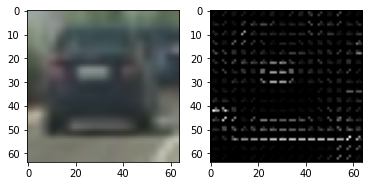

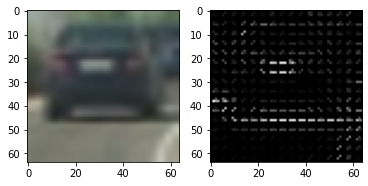

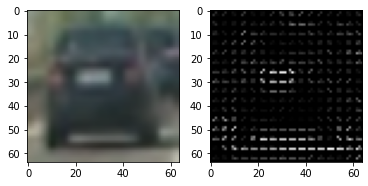

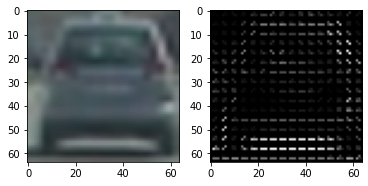

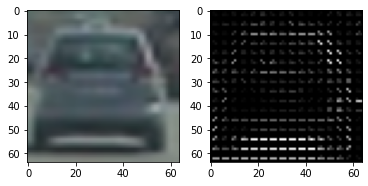

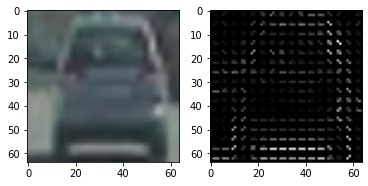

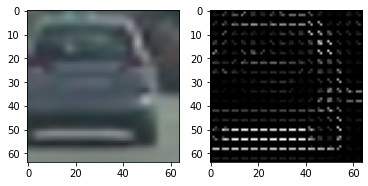

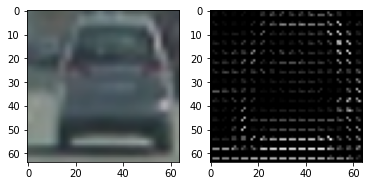

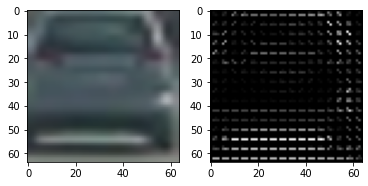

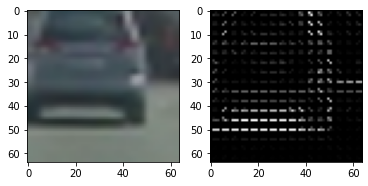

In [75]:
car_hog_test_test = car_hog_test(car_images_test)

In [ ]:
"""
hog 알고리즘 noncar 이미지 - 단 test 10개
"""

In [72]:
def noncar_hog_test(car_images_test):
    for noncar_image_show in noncar_images_test:
        img_show = cv2.imread(noncar_image_show)
        gray_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2GRAY)

        hog_noncar_feature_show, hog_noncar_image_show = hog(gray_show, orientations=9, pixels_per_cell=(4, 4), 
                                    cells_per_block=(2, 2), block_norm='L2-Hys',
                                    transform_sqrt=False, visualize=True,
                                    feature_vector=False)
        """#pixels_per_cell 픽셀 사이즈로 셀 생성
        cells_per_block - 셀 크기로 블록 생성
        orientations 방향
        """

        fig = plt.figure()
        plt.subplot(121)
        plt.imshow(img_show)

        plt.subplot(122)
        plt.imshow(hog_noncar_image_show, cmap='gray')
    
    return hog_noncar_feature_show, hog_noncar_image_show, plt.imshow(hog_noncar_image_show, cmap='gray')

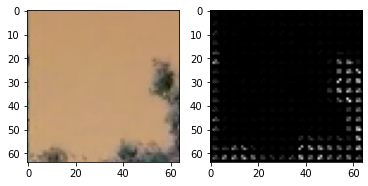

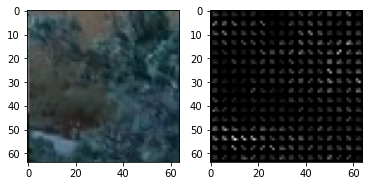

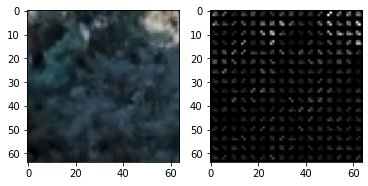

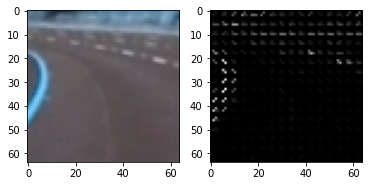

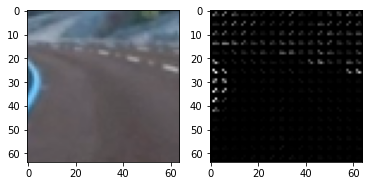

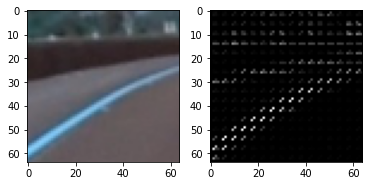

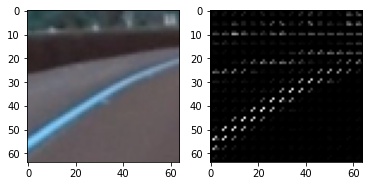

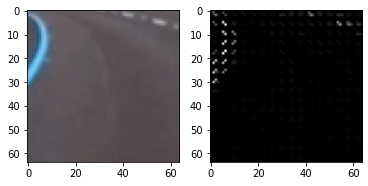

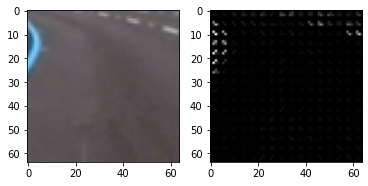

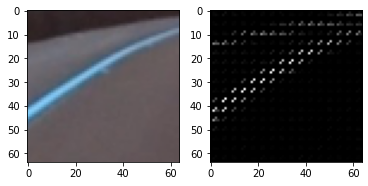

In [93]:
noncar_hog_test_test = noncar_hog_test(noncar_images_test)

In [ ]:
"""
히스토그램 분석
-자동차와 
-자동차 아닌것 으로 해야함
"""

In [88]:
def car_hist_test(car_image_test):
    for car_images_test_plt in car_images_test:
        #테스트용 앞에서 슬라이싱한 10개만 이용하기
        src = cv2.imread(car_images_test_plt)

        hist1_b = cv2.calcHist(images = [src], 
                             channels = [0], 
                             mask = None, 
                             histSize = [32], 
                             ranges = [0, 255])

        hist2_g = cv2.calcHist(images = [src], 
                             channels = [1], 
                             mask = None, 
                             histSize = [32], 
                             ranges = [0, 255])

        hist3_r = cv2.calcHist(images = [src], 
                             channels = [2], 
                             mask = None, 
                             histSize = [32], 
                             ranges = [0, 255])

        """
        히스토그램 분석
        """
        hist1_b = hist1_b.flatten()
        plt.plot(hist1_b, color='black')
        binX = np.arange(32)
        plt1 = plt.bar(binX, hist1_b, width=1, color='b')
        plt.show(plt1)

        hist2_g = hist2_g.flatten()
        plt.plot(hist2_g, color='black')
        binX = np.arange(32)
        plt2 = plt.bar(binX, hist2_g, width=1, color='g')
        plt.show(plt2)

        hist3_r = hist3_r.flatten()
        plt.plot(hist3_r, color='black')
        binX = np.arange(32)
        plt3 = plt.bar(binX, hist3_r, width=1, color='r')
        plt.show(plt3)

        print("="*80) 

        hist1_b_f = hist1_b.flatten()
        hist2_g_f = hist2_g.flatten()
        hist3_r_f = hist3_r.flatten()

        hist_show_f = np.concatenate([hist1_b_f, hist2_g_f, hist3_r_f]) # 특성 합치는 함수

        hist_show_f

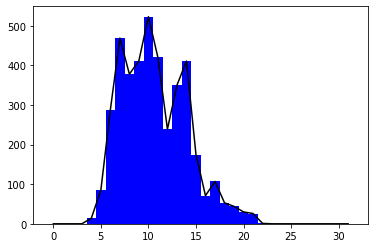

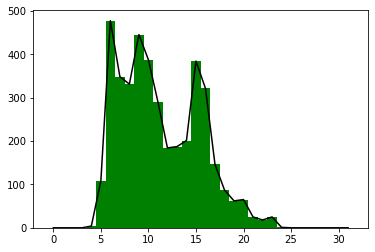

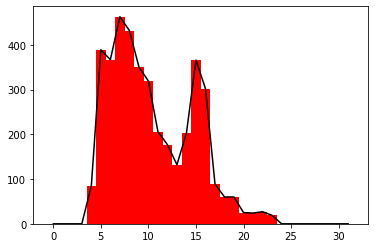

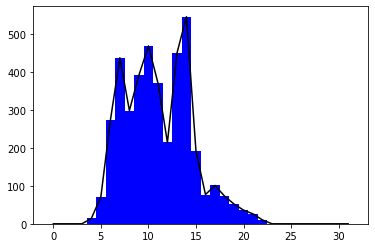

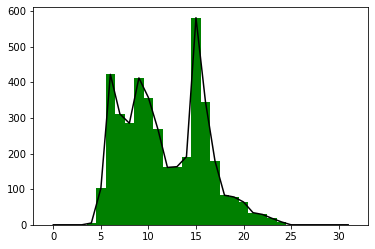

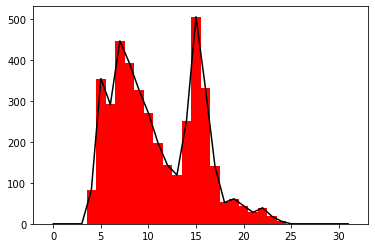

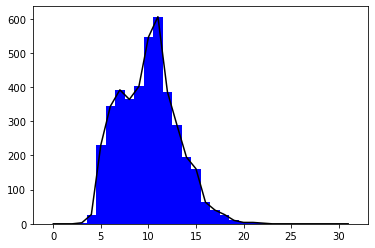

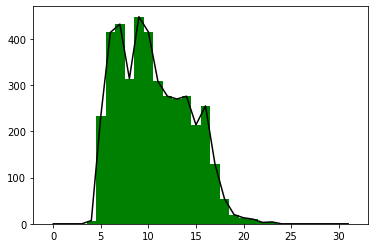

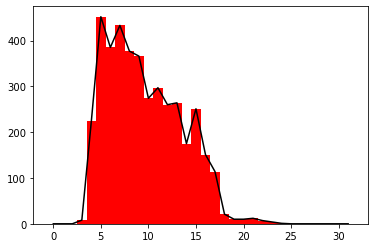

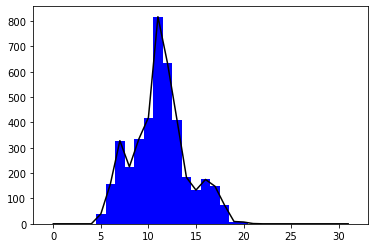

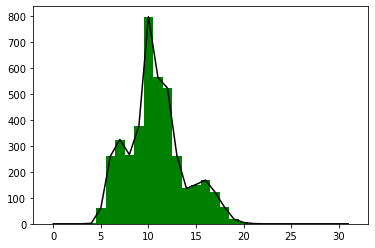

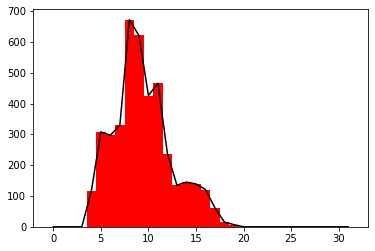

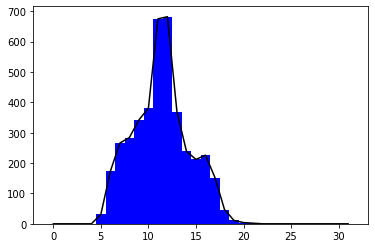

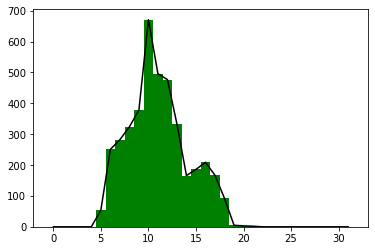

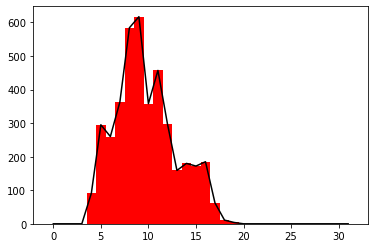

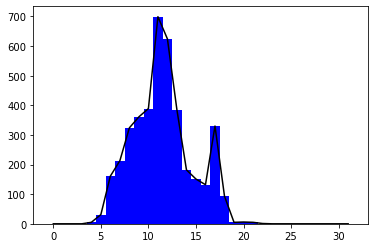

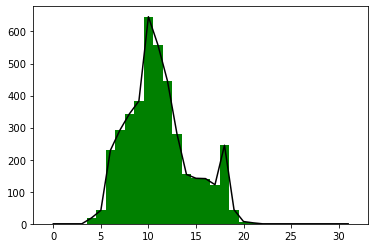

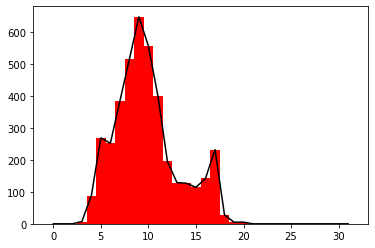

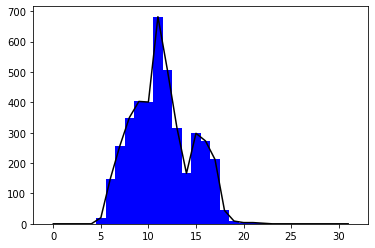

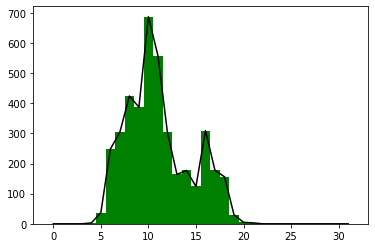

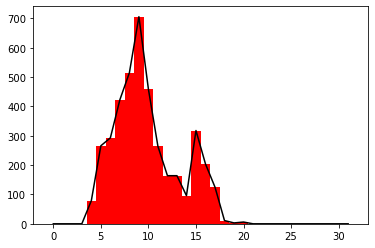

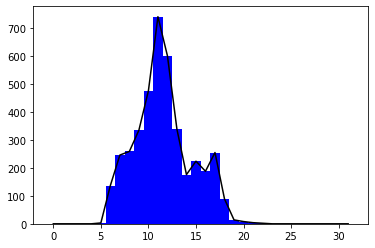

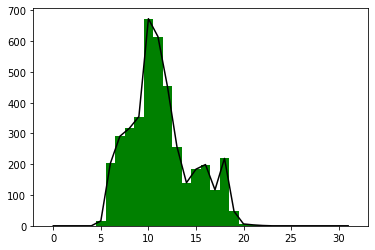

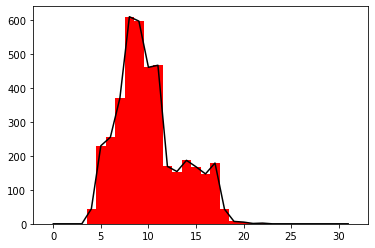

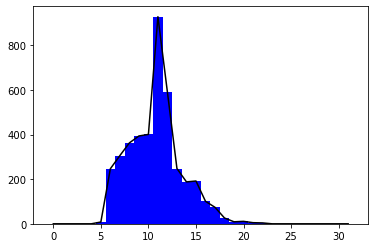

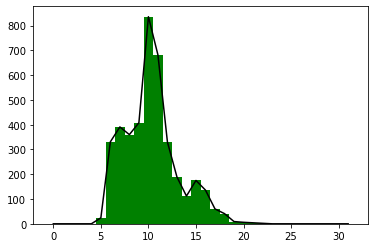

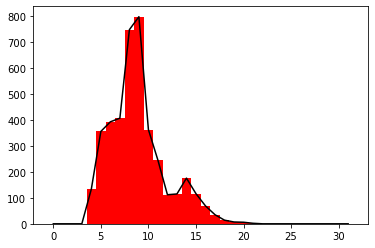

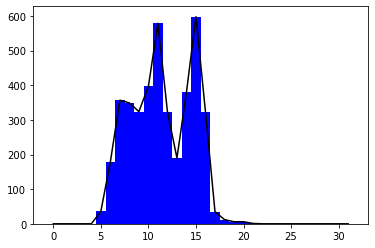

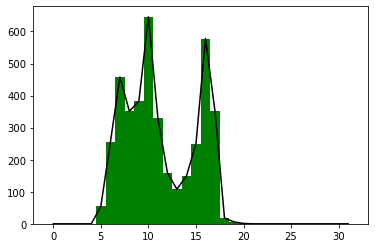

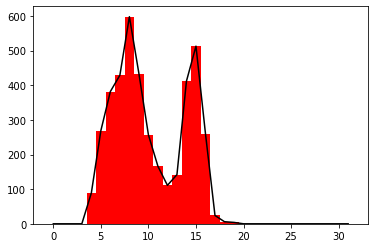

In [90]:
car_images_test_test = car_hist_test(car_images_test)

In [91]:
def noncar_hist_test(noncar_images_test):
    for noncar_images_test_plt in noncar_images_test:
        #테스트용 앞에서 슬라이싱한 10개만 이용하기
        src = cv2.imread(noncar_images_test_plt)

        hist1_b = cv2.calcHist(images = [src], 
                             channels = [0], 
                             mask = None, 
                             histSize = [32], 
                             ranges = [0, 255])

        hist2_g = cv2.calcHist(images = [src], 
                             channels = [1], 
                             mask = None, 
                             histSize = [32], 
                             ranges = [0, 255])

        hist3_r = cv2.calcHist(images = [src], 
                             channels = [2], 
                             mask = None, 
                             histSize = [32], 
                             ranges = [0, 255])

        """
        히스토그램 분석
        """
        hist1_b = hist1_b.flatten()
        plt.plot(hist1_b, color='black')
        binX = np.arange(32)
        plt1 = plt.bar(binX, hist1_b, width=1, color='b')
        plt.show(plt1)

        hist2_g = hist2_g.flatten()
        plt.plot(hist2_g, color='black')
        binX = np.arange(32)
        plt2 = plt.bar(binX, hist2_g, width=1, color='g')
        plt.show(plt2)

        hist3_r = hist3_r.flatten()
        plt.plot(hist3_r, color='black')
        binX = np.arange(32)
        plt3 = plt.bar(binX, hist3_r, width=1, color='r')
        plt.show(plt3)

        print("="*80) 

        hist1_b_f = hist1_b.flatten()
        hist2_g_f = hist2_g.flatten()
        hist3_r_f = hist3_r.flatten()

        hist_non_show_f = np.concatenate([hist1_b_f, hist2_g_f, hist3_r_f]) # 특성 합치는 함수

        hist_non_show_f


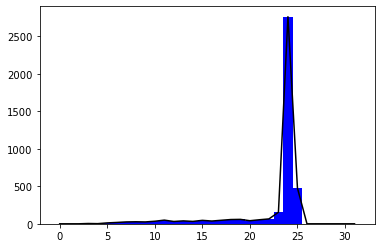

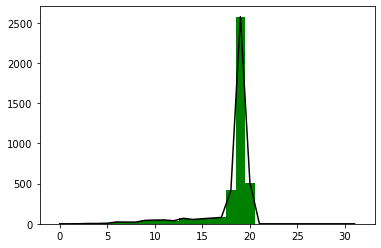

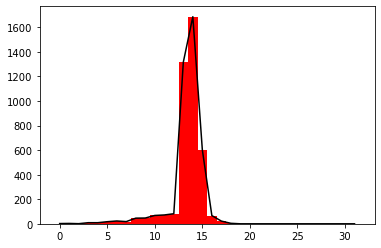

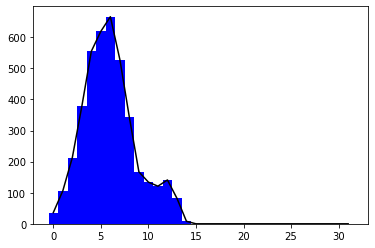

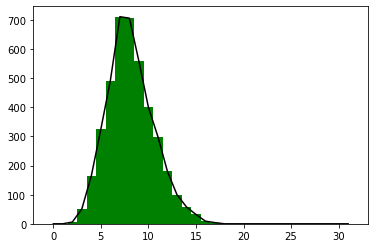

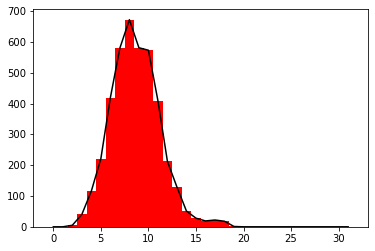

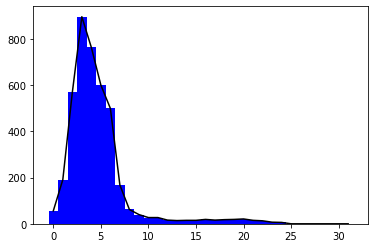

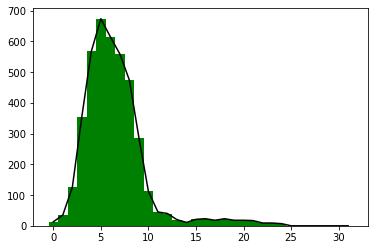

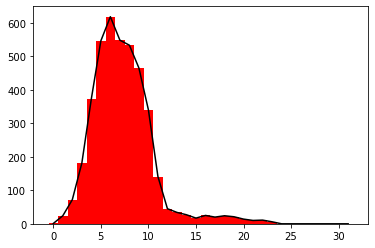

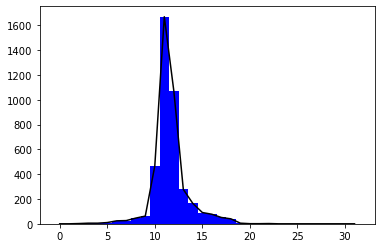

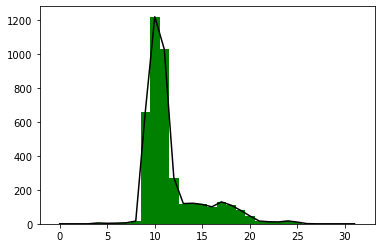

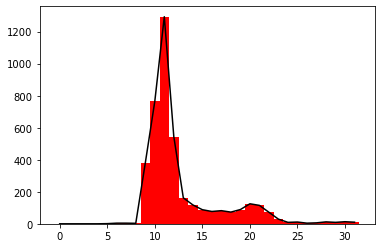

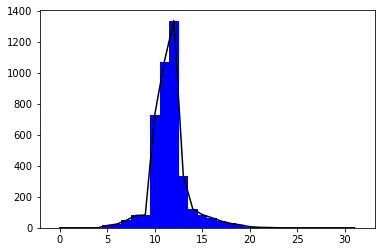

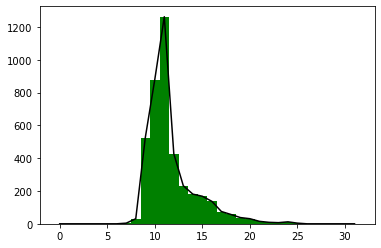

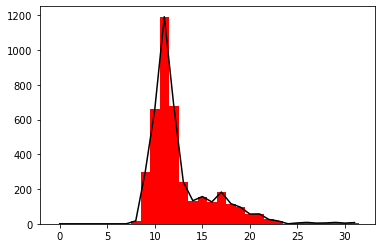

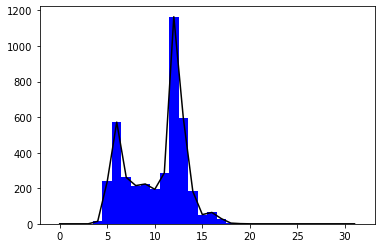

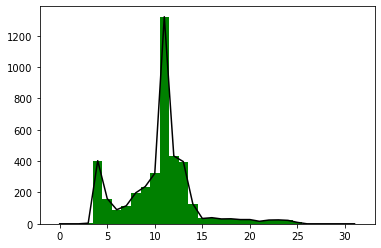

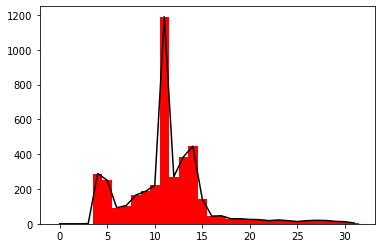

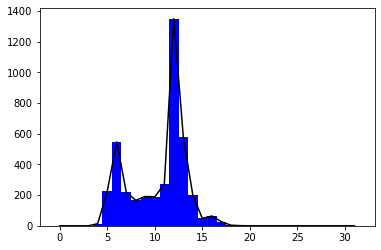

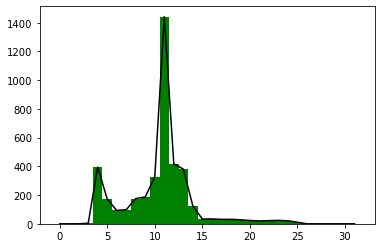

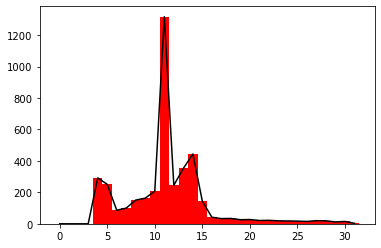

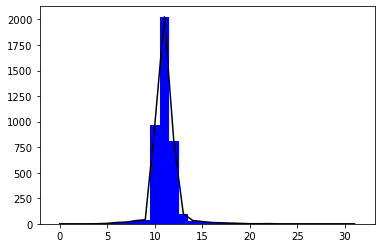

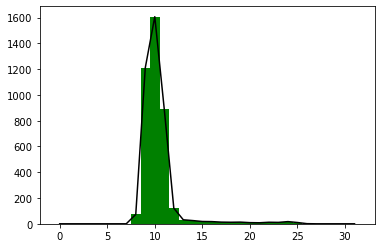

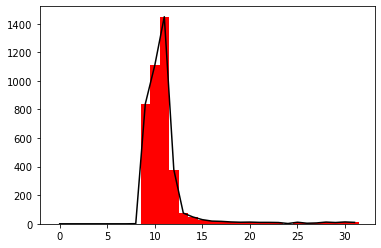

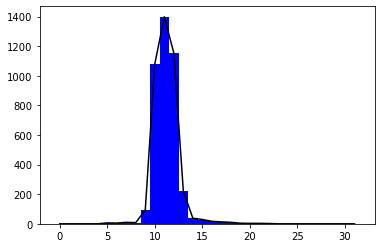

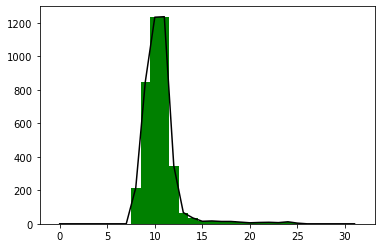

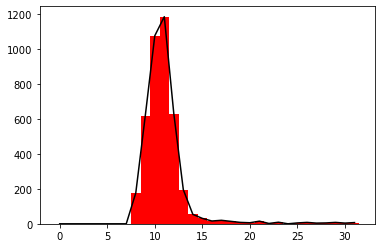

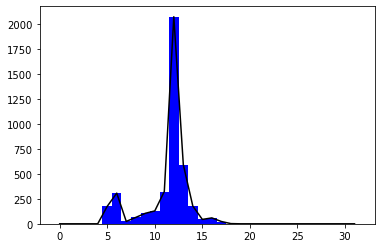

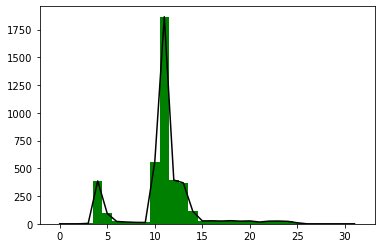

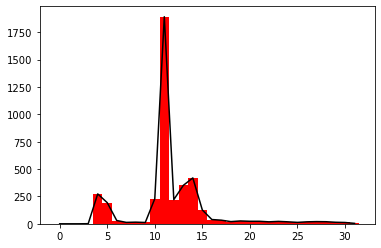

In [92]:
noncar_hist_test_test = noncar_hist_test(noncar_images_test)

In [ ]:
"""
hog_noncar_feature_show_f - 테스트용 10개 틀린 자동차 특성 

hog_noncar_feature_f - 전체 틀린 자동차 특성

hog_car_feature_f - 전체 자동차 특성

hog_car_feature_show_f - 테스트용 10개 자동차 특성

hist_show_f  - 테스트용 10개 자동차 히스토그램

hist_non_show_f - 테스트용 10개 틀린 자동차 히스토그램

src_resize_show_f - 테스트용 10개 자동차 이미지 리사이즈

src_non_resize_show_f - 테스트용 10개 틀린 자동차 이미지 리사이즈

hog_car_feature_answer - 정답 레이블

hog_noncar_feature_answer - 오답 레이브
"""

In [ ]:
X_car_show = np.concatenate([hog_car_feature_show_f, hist_show_f, src_resize_show_f]) # 특성 합치는 함수
X_noncar_show = np.concatenate([hog_noncar_feature_show_f, hist_non_show_f, src_non_resize_show_f])

In [ ]:
X_car_show

In [ ]:
X_noncar_show

In [ ]:
X_all_show = np.concatenate([X_car_show, X_noncar_show])

In [ ]:
X_all_show.shape

In [ ]:
len(X_all_show)

In [ ]:
hog_car_feature_answer.shape

In [ ]:
len(hog_car_feature_answer)
# len 길이가 왜 다른가

In [ ]:
# 정답 레이블 생성 - 테스트용 
hog_car_feature_answer_show = []
x =1 
hog_car_feature_answer_show = np.repeat(x, len(X_all_show))
print(hog_car_feature_answer_show)
len(hog_car_feature_answer_show)

In [ ]:
"""
머신러닝 부분 - 
문제는 값이 -1~1 을 넘어선값
"""

In [ ]:
X = X_all_show
y = hog_car_feature_answer_show

In [ ]:
std_scaler = StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train

In [ ]:
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)